In [1]:
import pandas as pd
df = pd.read_csv("House_Price.csv")        ## load file csv vào pd.DataFrame

In [2]:
df                 ## xem thử DataFrame

,Size in feet squared,Price in thousand dollar
0,2497,729
1,1627,617
2,576,290
3,2156,728
4,1154,453
...,...,...
95,579,207
96,1551,368
97,2243,514
98,803,372


Text(0, 0.5, 'Price in thousand dollar')

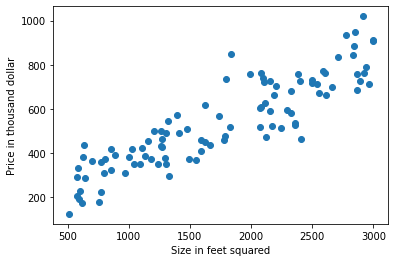

In [3]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

In [4]:
X = df['Size in feet squared'].values   
X = X.reshape(-1, 1)                   
y = df['Price in thousand dollar'].values 
y = y.reshape(-1,1)

In [5]:
import numpy as np

a, b = 1.0, 100.0           ## khởi tạo a, b

n_iter = 10000           ## số vòng lặp cập nhật a, b
lmda = 0.0000001          ## learning rate
for ii in range(n_iter):
    error = y - a*X-b
    a = a - 2* lmda * np.mean(error*(-X))    ##cập nhật a và b
    b = b - 2* lmda * np.mean(error*(-1))
    if ii % 1000 == 0:
        loss = np.mean(np.square(y - a*X-b))
        print("Loss at iter {}: {}".format(ii, loss))
loss = np.mean(np.square(y - a*X-b))
print("Final loss: ", loss)

Loss at iter 0: 163043.0689746898
Loss at iter 1000: 8650.560799446657
Loss at iter 2000: 8650.552741546615
Loss at iter 3000: 8650.544684154267
Loss at iter 4000: 8650.536627269585
Loss at iter 5000: 8650.528570892531
Loss at iter 6000: 8650.52051502308
Loss at iter 7000: 8650.512459661195
Loss at iter 8000: 8650.504404806845
Loss at iter 9000: 8650.496350459996
Final loss:  8650.488304674207


In [6]:
error.shape, X.shape

((100, 1), (100, 1))

Text(0, 0.5, 'Price in thousand dollar')

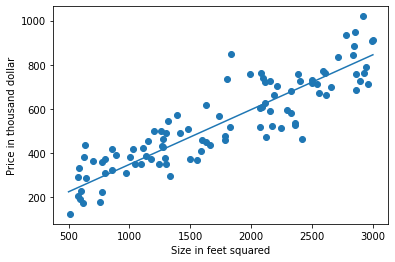

In [7]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.plot(np.arange(500, 3000), a*np.arange(500, 3000) + b)   ## vẽ solution tìm được
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

In [8]:
g_a, g_b = a, b

In [9]:
X = df['Size in feet squared'].values   
X = X.reshape(-1, 1)                   
y = df['Price in thousand dollar'].values 
y = y.reshape(-1,1)

In [10]:
import numpy as np
Z = np.concatenate([X, np.ones((X.shape[0],1))], axis=-1) ## thêm một cột toàn số 1

In [11]:
theta = np.asarray([[1.0], [100.0]])     ## khởi tạo theta

n_iter = 10000           ## số vòng lặp cập nhật theta
lmda = 0.0000001          ## learning rate
for ii in range(n_iter):
    error = y - np.matmul(Z, theta)
    theta =  theta - 2/Z.shape[0]*lmda*np.matmul(-Z.T, error)   ##cập nhật theta
    if ii % 1000 == 0:
        loss = np.mean(np.square(y - np.matmul(Z, theta)))
        print("Loss at iter {}: {}".format(ii, loss))

loss = np.mean(np.square(y - np.matmul(Z,theta)))
print("Final loss: ",loss)
print("Final theta: ",theta)

Loss at iter 0: 163043.0689746897
Loss at iter 1000: 8650.560799446655
Loss at iter 2000: 8650.552741546615
Loss at iter 3000: 8650.544684154269
Loss at iter 4000: 8650.536627269585
Loss at iter 5000: 8650.528570892531
Loss at iter 6000: 8650.52051502308
Loss at iter 7000: 8650.512459661195
Loss at iter 8000: 8650.504404806845
Loss at iter 9000: 8650.496350459998
Final loss:  8650.488304674207
Final theta:  [[  0.24853945]
 [100.00861344]]


In [12]:
## exact solution
import numpy as np
Z = np.concatenate([X, np.ones((100,1))], axis=-1)   
Z = Z.astype(np.float64)       

## giá trị a và b tìm được
T = np.matmul(np.matmul(np.linalg.inv(np.matmul(Z.T,Z)), Z.T), y)
e_a, e_b = T[0][0], T[1][0]
print(e_a, e_b)

0.23481102424914324 128.49450039983012


In [13]:
## SkLearn

from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X, y)                ## train LinearRegression 
sk_a, sk_b = lr.coef_[0][0], lr.intercept_[0]    ## lấy các tham số học được
print("a = {}, b = {}".format(sk_a, sk_b))

a = 0.23481102424914332, b = 128.4945003998301


In [14]:
print("GD MSE: ", np.mean(np.square(y - g_a*X-g_b)))
print("Exact SOl MSE: ", np.mean(np.square(y - e_a*X-e_b)))
print("SK MSE: ", np.mean(np.square(y - sk_a*X-sk_b)))

GD MSE:  8650.488304674207
Exact SOl MSE:  8522.669588077446
SK MSE:  8522.669588077446


Text(0, 0.5, 'Price in thousand dollar')

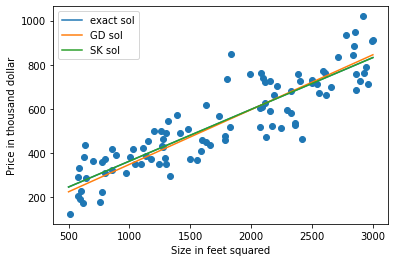

In [15]:
## vẽ hình
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.plot(np.arange(500, 3000), e_a*np.arange(500, 3000) + e_b, label="exact sol") 
plt.plot(np.arange(500, 3000), g_a*np.arange(500, 3000) + g_b, label="GD sol")   
plt.plot(np.arange(500, 3000), sk_a*np.arange(500, 3000) + sk_b, label="SK sol")   
plt.legend()
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")